# Import Thư viện

In [3]:
import pandas as pd
import re
from nltk import ngrams
from pyvi.pyvi import ViTokenizer
from scipy import stats
import numpy as np



# Load Dữ liệu train và stopwords

In [4]:
df = pd.read_csv('dataNLP.csv', header=None,names=['index','title','description'])
f = open('stopwords.txt','r')
stopwords = ['tập)', '(phần','dù',"div",'một','hai','ba','bốn','năm','sáu','bảy','tám','chín','mười']
for word in f:
    stopwords.append(word.strip()+ ' ')
f.close()
df.head(20)

,index,title,description
0,100000008,cô dâu 15 tuổi (my little bride),"sang min là dân mỹ thuật, tính đào hoa thích t..."
1,100000019,thất đại tội (24 tập) (the seven deadly sins),"24 tập phim theo chân elizabeth, công chúa thứ..."
2,100000026,cô gái ngoài hành tinh (13 tập) (brynhildr in ...,murakami luôn bị ám ảnh vì đã để người bạn thu...
3,100000031,10 phần yêu (love is not all around),"dù là cô nàng ""sát giai"", có nhiều mánh lới ""d..."
4,100000042,lớp học ám sát (phần 2) (assassination classro...,các học sinh lớp 3e-1 bước vào học kỳ thứ hai....
5,100000050,những giây cuối cùng (the final countdown),"năm 1980, trong lúc tập trận ở hawaii, một cơn..."
6,100000054,vua bịp đại chiến las vegas (the conmen in vegas),tài tử điện ảnh số một hồng kông tiếp tục có m...
7,100000059,vì yêu (a view of love),marc sở hữu gần như mọi thứ mà một người đàn ô...
8,100000061,cớm lưu manh (untouchable lawmen),"lee jung jin, một cảnh sát nắm đấm đi trước lờ..."
9,100000069,yêu không dễ (64 tập) (yeu khong de),"quy tụ dàn diễn viên “hot”, phim xoay quanh nh..."


# Tiền xử  lí dữ liệu, lọc stopwords và các kí tự

In [5]:
def transform_row(row):
    # Xóa số dòng ở đầu câu
    row = row.split("(")[0]
    row = re.sub(r"[0-9]", "", row)
    for word in stopwords:
        row = row.replace(word,"")
    # Xóa dấu chấm, phẩy, hỏi ở cuối câu
    row = re.sub(r"[\.,\?]+$", "", row)
    # Xóa các kí tự khác
    char = ''',.;":'?!()-<>/'''
    for c in char:
        row = row.replace(c," ")
    row = row.replace(",", " ").replace(".", " ") \
        .replace(";", " ").replace("“", " ") \
        .replace(":", " ").replace("”", " ") \
        .replace('"', " ").replace("'", " ") \
#         .replace("!", " ").replace("?", " ") \
#         .replace("(", " ").replace(")", " ") \
#         .replace("-"," ").replace("div"," ") \
#         .replace("<"," ").replace(">"," ") \

    row = row.strip()
    return row 

df['title'] = df.title.apply(transform_row)
df['description'] = df.description.apply(transform_row)
df.head(20)

,index,title,description
0,100000008,cô dâu tuổi,sang min dân mỹ thuật tính đào hoa thích đuổi...
1,100000019,thất đại tội,tập phim chân elizabeth công chúa thứ vương ...
2,100000026,cô gái ngoài hành tinh,murakami luôn ám ảnh người bạn thuở nhỏ kuro...
3,100000031,phần yêu,cô nàng sát giai mánh lới dắt mũi đàn ông...
4,100000042,lớp học ám sát,học sinh lớp e bước học kỳ thứ họ nhận nhiệ...
5,100000050,giây cuối cùng,trong tập trận ở hawaii cơn bão siêu nhiên x...
6,100000054,vua bịp đại chiến las vegas,tài tử điện ảnh số hồng kông tiếp tục màn hóa...
7,100000059,yêu,marc sở hữu gần mọi thứ người đàn ông trung n...
8,100000061,cớm lưu manh,lee jung jin cảnh sát nắm đấm đi lời nói jo...
9,100000069,yêu không dễ,quy tụ dàn diễn viên hot phim xoay quanh ân...


# Tách từ Tiếng Việt

In [6]:
def str_tokenizer(string):
    gram_str = list(ViTokenizer.tokenize(string.decode('utf-8')).split())
    return gram_str
df["token_title"] = df.title.apply(lambda t : str_tokenizer(t))
df["token_description"] = df.description.apply(lambda t : str_tokenizer(t))
df.head(20)

,index,title,description,token_title,token_description
0,100000008,cô dâu tuổi,sang min dân mỹ thuật tính đào hoa thích đuổi...,"[cô_dâu, tuổi]","[sang, min, dân, mỹ_thuật, tính, đào_hoa, thíc..."
1,100000019,thất đại tội,tập phim chân elizabeth công chúa thứ vương ...,"[thất, đại_tội]","[tập, phim, chân, elizabeth, công_chúa, thứ, v..."
2,100000026,cô gái ngoài hành tinh,murakami luôn ám ảnh người bạn thuở nhỏ kuro...,"[cô, gái, ngoài, hành_tinh]","[murakami, luôn, ám_ảnh, người, bạn, thuở, nhỏ..."
3,100000031,phần yêu,cô nàng sát giai mánh lới dắt mũi đàn ông...,"[phần, yêu]","[cô, nàng, sát, giai, mánh_lới, dắt_mũi, đàn_ô..."
4,100000042,lớp học ám sát,học sinh lớp e bước học kỳ thứ họ nhận nhiệ...,"[lớp_học, ám_sát]","[học_sinh, lớp, e, bước, học_kỳ, thứ, họ, nhận..."
5,100000050,giây cuối cùng,trong tập trận ở hawaii cơn bão siêu nhiên x...,"[giây, cuối_cùng]","[trong, tập_trận, ở, hawaii, cơn, bão, siêu_nh..."
6,100000054,vua bịp đại chiến las vegas,tài tử điện ảnh số hồng kông tiếp tục màn hóa...,"[vua, bịp, đại_chiến, las_vegas]","[tài_tử, điện_ảnh, số, hồng, kông, tiếp_tục, m..."
7,100000059,yêu,marc sở hữu gần mọi thứ người đàn ông trung n...,[yêu],"[marc, sở_hữu, gần, mọi, thứ, người, đàn_ông, ..."
8,100000061,cớm lưu manh,lee jung jin cảnh sát nắm đấm đi lời nói jo...,"[cớm, lưu_manh]","[lee, jung, jin, cảnh_sát, nắm_đấm, đi, lời_nó..."
9,100000069,yêu không dễ,quy tụ dàn diễn viên hot phim xoay quanh ân...,"[yêu, không, dễ]","[quy_tụ, dàn, diễn_viên, hot_phim, xoay, quanh..."


# Train LDA Model

In [7]:
from gensim import corpora, models
import gensim
df["context"] = df["token_title"] + df["token_description"]
train_data = df.context.tolist()
dictionary = corpora.Dictionary(train_data)
corpus = [dictionary.doc2bow(text) for text in train_data]
num_topics=25
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=20)

# Hiển thị các topic 

In [8]:
t = ldamodel.print_topics(num_topics=num_topics, num_words=10)
for i,j in t:
    print i,j

0 0.020*"không" + 0.020*"cô" + 0.020*"người" + 0.014*"trong" + 0.014*"mình" + 0.012*"họ" + 0.011*"con" + 0.011*"về" + 0.008*"anh" + 0.008*"đến"
1 0.019*"người" + 0.018*"trong" + 0.014*"họ" + 0.013*"cuộc" + 0.012*"nhiệm_vụ" + 0.011*"tàu" + 0.009*"mỹ" + 0.009*"lính" + 0.008*"đến" + 0.008*"kẻ"
2 0.017*"trong" + 0.016*"phim" + 0.011*"thiếu" + 0.010*"người" + 0.010*"phần" + 0.009*"không" + 0.009*"lâm" + 0.008*"bộ" + 0.008*"ma" + 0.007*"còn"
3 0.011*"ji" + 0.010*"hee" + 0.009*"vương" + 0.006*"văn_phòng" + 0.006*"mặt_trăng" + 0.005*"duyệt" + 0.005*"đông" + 0.005*"tiêu" + 0.005*"khiến" + 0.005*"danh_sách"
4 0.027*"cảnh_sát" + 0.025*"anh" + 0.021*"kẻ" + 0.021*"mình" + 0.019*"giết" + 0.019*"vụ" + 0.018*"người" + 0.017*"không" + 0.017*"trong" + 0.012*"chết"
5 0.014*"kiếm" + 0.012*"ân" + 0.009*"oán" + 0.008*"ông" + 0.008*"tranh_giành" + 0.007*"huy" + 0.007*"giữa" + 0.007*"yên" + 0.006*"bình" + 0.006*"huyền_bí"
6 0.029*"người" + 0.017*"trong" + 0.014*"phim" + 0.013*"về" + 0.013*"ở" + 0.012*"đến" + 

min: 393|max: 2129|std: 438.075197198|mean: 1018.04


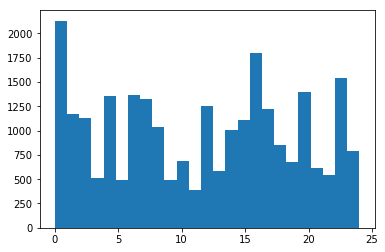

In [10]:
from matplotlib import pyplot as plt
topics = [0]*num_topics
for item in ldamodel[corpus]:
    for i,j in item : 
        topics[i]+= 1

topics = np.asarray(topics)
print 'min: '+ str(np.amin(topics))+'|'+ 'max: '+ str(np.amax(topics)) +'|'+'std: '+ str(np.std(topics)) + '|' + 'mean: ' + str(np.mean(topics))
x = [i for i in range(num_topics)]
plt.hist(x,num_topics, weights=topics)
plt.show()
